# 신용카드 사용자 연체 예측

## 목적
신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발

## 데이터 설명
train.csv

train 데이터 : 신용카드 사용자들의 개인 신상정보
credit 열 포함
train.shape : (26457, 20)


test.csv

test 데이터 : 신용카드 사용자들의 개인 신상정보
credit 열 미포함
test.shape : (10000, 19)


sample_submission.csv

정답 제출 파일
sample_submission.shape :(10000, 4)

### 데이터 변수 설명
* index  
* gender: 성별  
* car: 차량 소유 여부  
* reality: 부동산 소유 여부  
* child_num: 자녀 수
* income_total: 연간 소득
* income_type: 소득 분류   
['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

* edu_type: 교육 수준   
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

* family_type: 결혼 여부   
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

* house_type: 생활 방식   
['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']

* DAYS_BIRTH: 출생일   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미   
    
* DAYS_EMPLOYED: 업무 시작일   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미   
양수 값은 고용되지 않은 상태를 의미함   

* FLAG_MOBIL: 핸드폰 소유 여부
* work_phone: 업무용 전화 소유 여부
* phone: 전화 소유 여부
* email: 이메일 소유 여부
* occyp_type: 직업 유형													
* family_size: 가족 규모
* begin_month: 신용카드 발급 월   
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도   
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

# 라이브러리 & 데이터 불러오기

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score, log_loss

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
submission=pd.read_csv('data/sample.csv')

# EDA

In [3]:
print(train.shape)
train.head()

(26457, 20)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
print(test.shape)
test.head()

(10000, 19)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

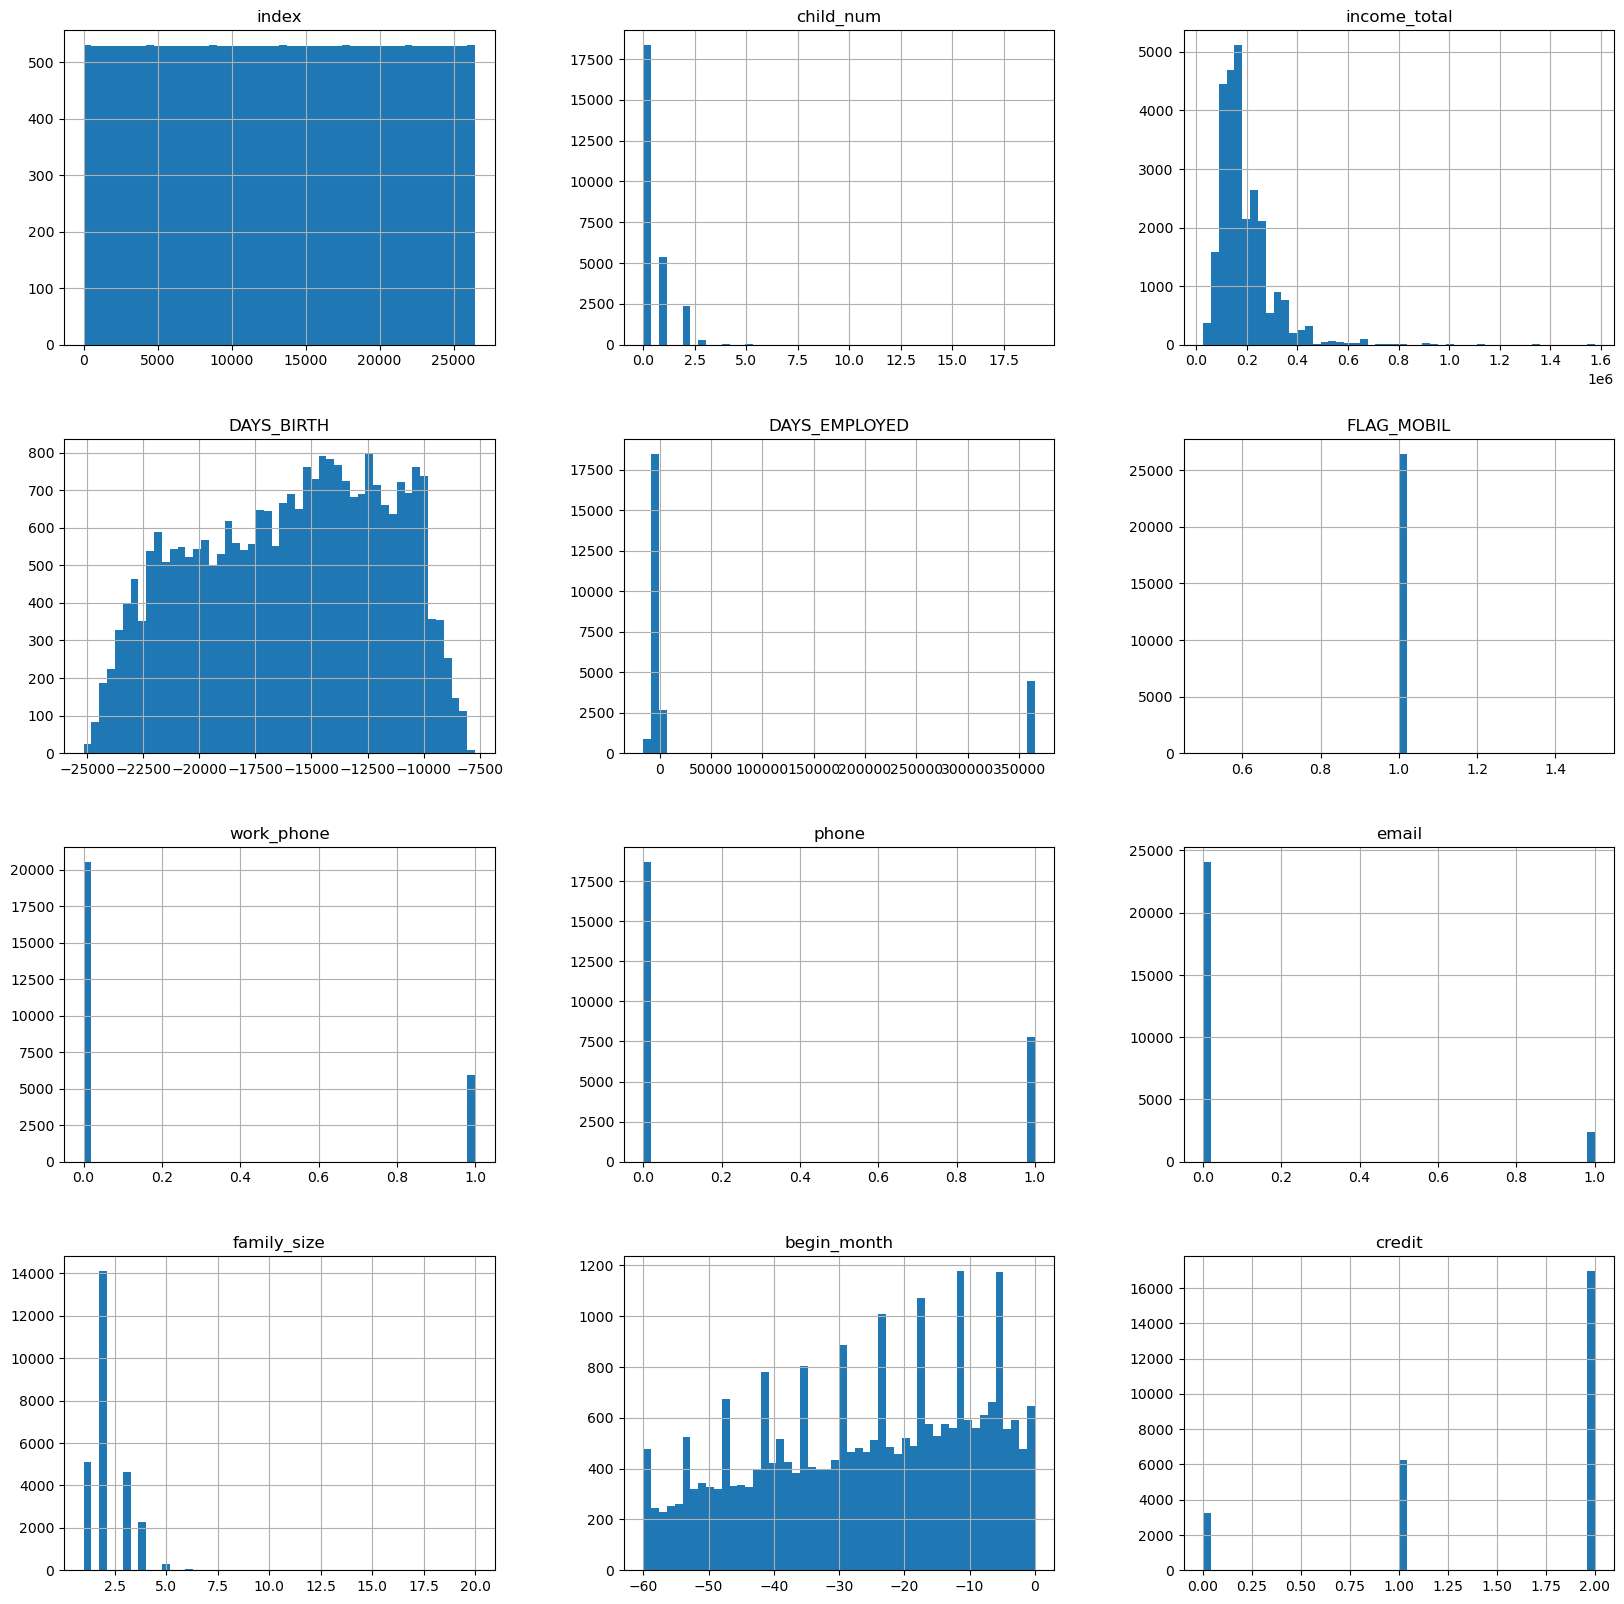

In [6]:
train.hist(figsize=(20,20), bins=50);

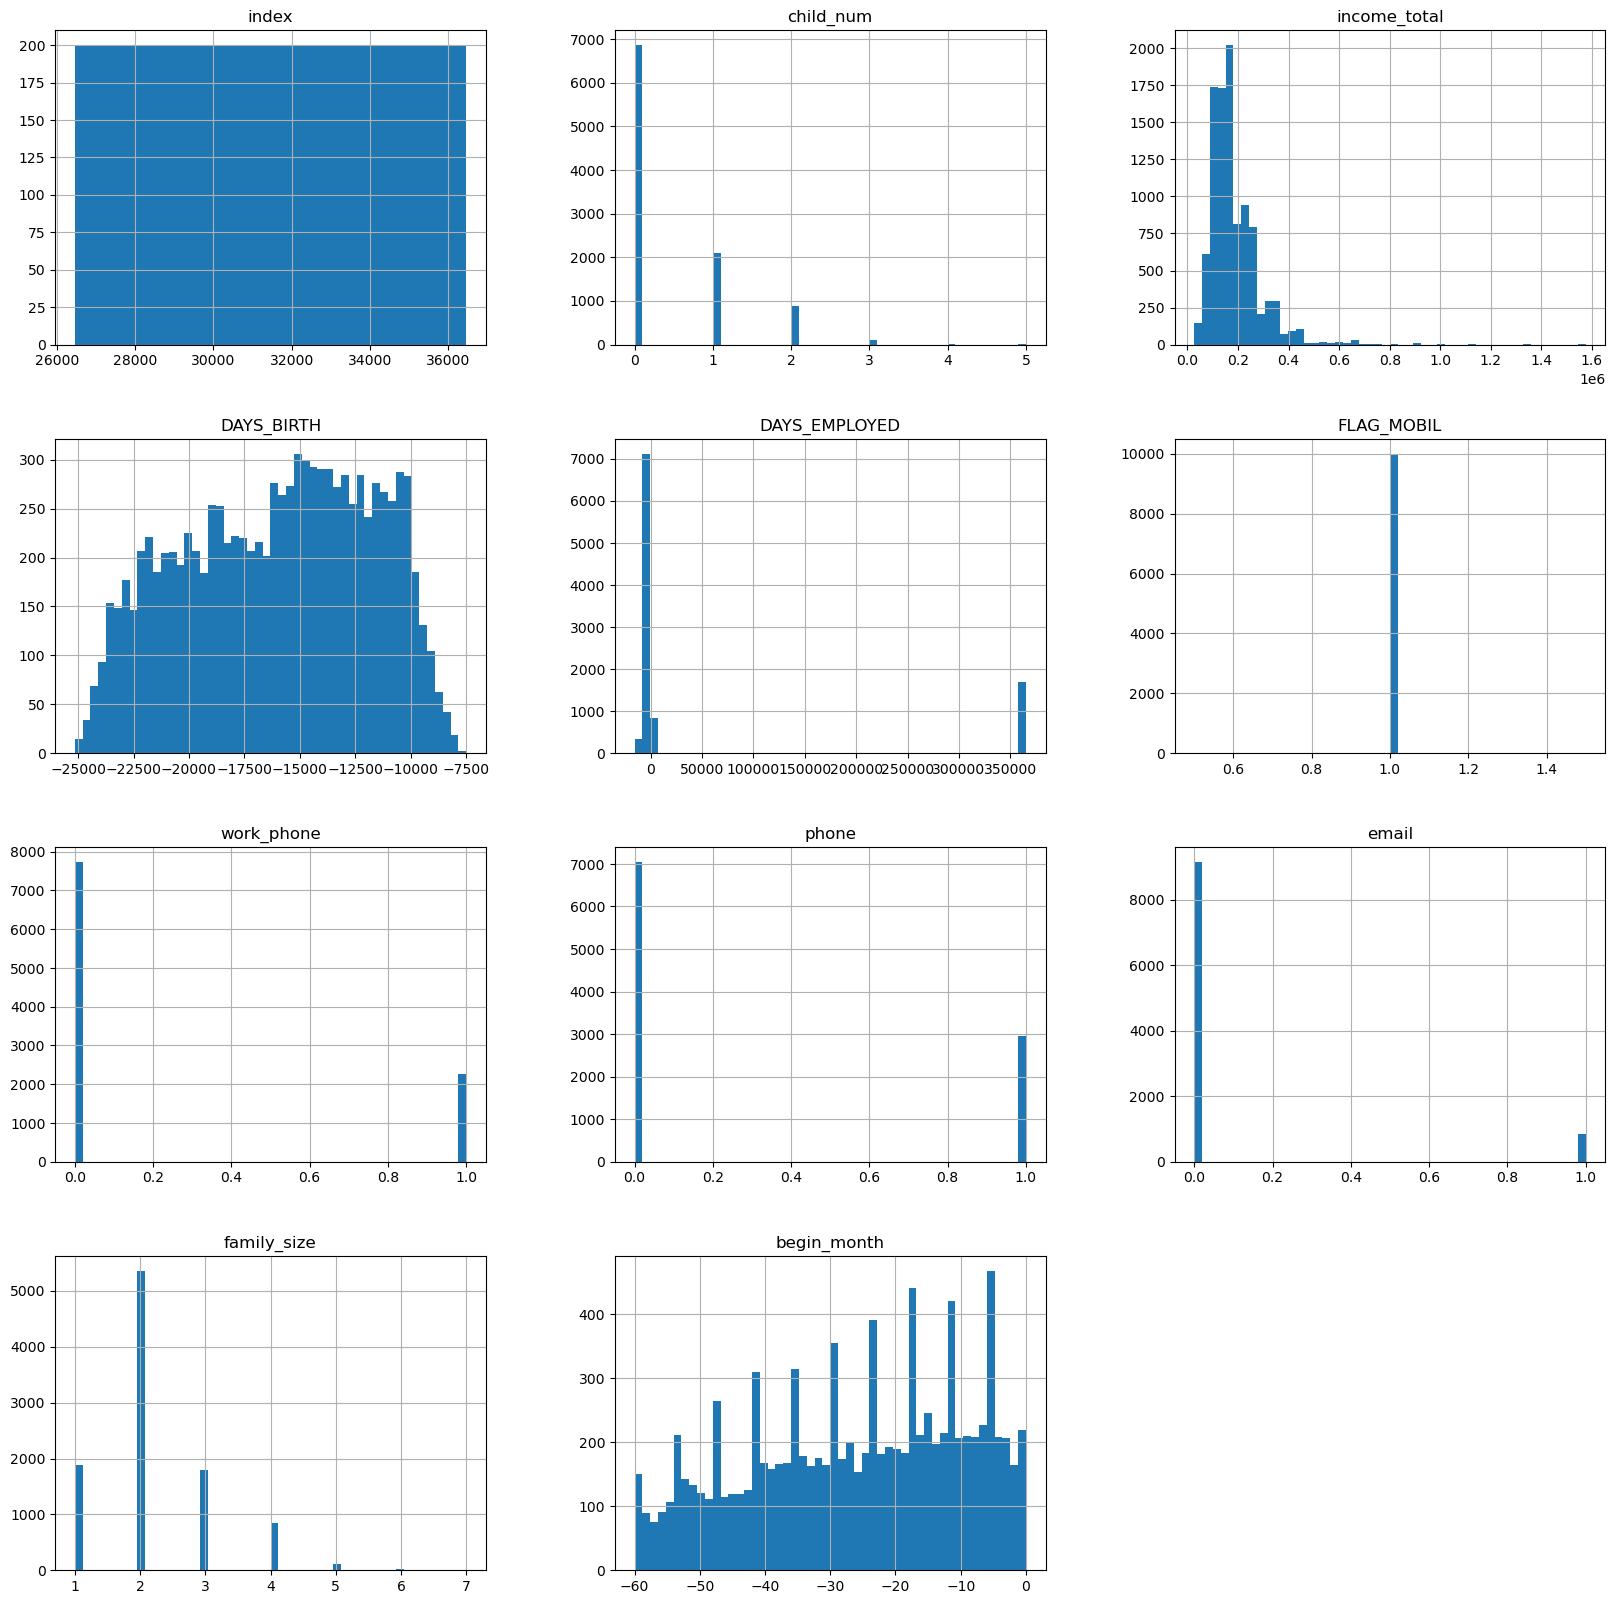

In [7]:
test.hist(figsize=(20,20), bins=50);

# 전처리

In [8]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [9]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [10]:
# 결측치의 수가 많아 삭제
train = train.drop(columns = "occyp_type")
test=test.drop(columns ='occyp_type')

## 인코딩

In [11]:
# 성별컬럼을 female로 만들어 여성인경우에만 1
train["female"] = train["gender"] == "F"
test["female" ] = test["gender"] ==  "F"
# tf가 int타입이 아닌것이 안먹히는것 같아서 bool을 int로 변경
train['female'] = train['female'].replace(True,1)
train['female'] = train['female'].replace(False,0)
test['female'] = test['female'].replace(True,1)
test['female'] = test['female'].replace(False,0)
# gender컬럼 제거
train = train.drop(columns = "gender")
test = test.drop(columns = "gender")

In [12]:
train["female"]

0        1
1        1
2        0
3        1
4        1
        ..
26452    1
26453    1
26454    1
26455    0
26456    1
Name: female, Length: 26457, dtype: int64

In [13]:
# 자동차를 소유한 사람을 Y에서 1로 바꾸기
train['car'] = train['car'] == "Y"
test['car'] = test['car'] == "Y"

train['car'] = train['car'].replace(True,1)
train['car'] = train['car'].replace(False,0)
test['car'] = test['car'].replace(True,1)
test['car'] = test['car'].replace(False,0)

In [14]:
# 부동산을 소유한 사람을 Y에서 1로 바꾸기
train['reality'] = train['reality'] == "Y"
test['reality'] = test['reality'] == "Y"

train['reality'] = train['reality'].replace(True,1)
train['reality'] = train['reality'].replace(False,0)
test['reality'] = test['reality'].replace(True,1)
test['reality'] = test['reality'].replace(False,0)

In [15]:
# 값의 폭이 상당히 크기 때문에 변환을 진행
train['income_log'] = np.log(train['income_total'])
test['income_log'] = np.log(test['income_total'])

In [16]:
# income_type -> 소득 분류, 학생(Student)말고는 별 차이 없을것 같아 학생은 0, 다른것들은 1로 통일
# train["income_type"].replace("")
income_dic = {'Student':0, 'Commercial associate':1, 'Working':1, 'State servant':1, 'Pensioner':1}
train['income_type'].replace(income_dic,inplace=True)
train['income_type']

income_dic = {'Student':0, 'Commercial associate':1, 'Working':1, 'State servant':1, 'Pensioner':1}
test['income_type'].replace(income_dic,inplace=True)
test['income_type']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: income_type, Length: 10000, dtype: int64

In [17]:
# 교육 수준은 양적으로 볼 수 있다고 판단하여 일단 교육수준이 높을수록 높은 값을 할당
# 'Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree' 순으로 1,2,3,4,5 매핑
edu_dic = {'Lower secondary':1, 'Secondary / secondary special':2, 'Incomplete higher':3, 'Higher education':4, 'Academic degree':5}
train['edu_type'].replace(edu_dic,inplace=True)
train['edu_type']

edu_dic = {'Lower secondary':1, 'Secondary / secondary special':2, 'Incomplete higher':3, 'Higher education':4, 'Academic degree':5}
test['edu_type'].replace(edu_dic,inplace=True)
test['edu_type']

0       2
1       4
2       2
3       2
4       4
       ..
9995    3
9996    2
9997    2
9998    2
9999    4
Name: edu_type, Length: 10000, dtype: int64

In [18]:
# 결혼과 미혼으로 나누기
# Marride = Married + Civil marriage
# Single = Single / not married  + Separated + Widow (과부)
train["family_type"].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [19]:
train["Married"] = train['family_type'][train['family_type']=='Single / not married'] = 'Single'
train["Married"] = train['family_type'][train['family_type']=='Separated'] = 'Single'
train["Married"] = train['family_type'][train['family_type']=='Widow'] = 'Single'
train["Married"] = train['family_type'][train['family_type']=='Civil marriage'] = 'Married'
train["Married"] = train['family_type'].value_counts()

test["Married"] = test['family_type'][test['family_type']=='Single / not married'] = 'Single'
test["Married"] = test['family_type'][test['family_type']=='Separated'] = 'Single'
test["Married"] = test['family_type'][test['family_type']=='Widow'] = 'Single'
test["Married"] = test['family_type'][test['family_type']=='Civil marriage'] = 'Married'
test["Married"] = test['family_type'].value_counts()

In [20]:
# 결혼은 1, 미혼은 0으로 변경
train["Married"] = train['family_type'] == "Married"
test["Married"] = test['family_type'] == "Married"

train['Married'] = train['Married'].replace(True,1)
train['Married'] = train['Married'].replace(False,0)
test['Married'] = test['Married'].replace(True,1)
test['Married'] = test['Married'].replace(False,0)

<AxesSubplot:>

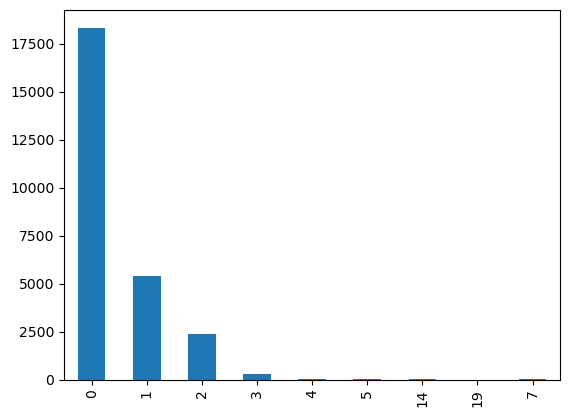

In [21]:
# child_num을 구간화 (binning)
train['child_num'].value_counts(sort=False).plot.bar()

In [22]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num']>=2, 'child_num']=2

<AxesSubplot:>

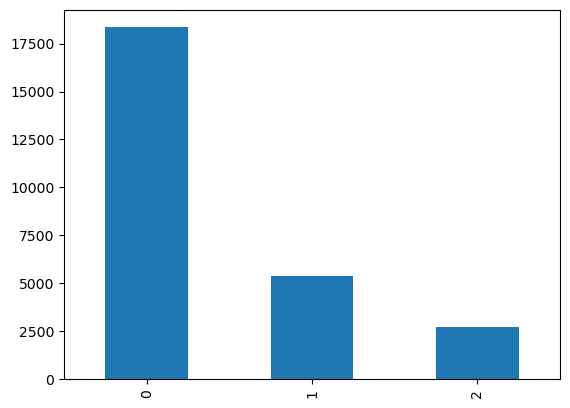

In [23]:
train['child_num'].value_counts(sort=False).plot.bar()

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

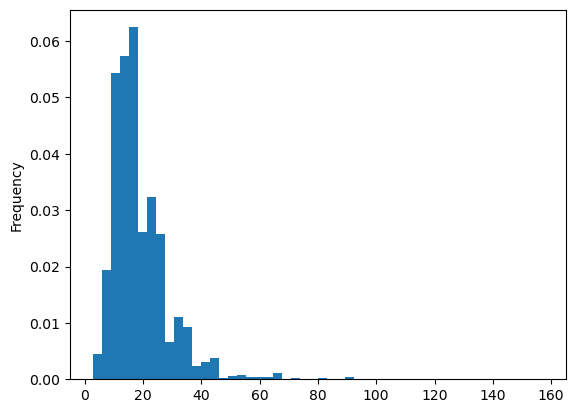

In [24]:
train['income_total'] = train['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000
##############################################################3
print(train['income_total'].value_counts(bins=10,sort=False))
train['income_total'].plot(kind='hist',bins=50,density=True)

In [25]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]
#bin_dividers는 train기준!!
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)


In [26]:
# 나머지도 수치형으로 변환
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])

train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])

In [27]:
# 데이터 나누기
X_train=train.drop(columns = ['credit',"family_type"], axis=1)
y_train=train['credit']
X_test=test.drop(columns =["family_type"], axis=1)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(26457, 19)
(10000, 19)
(26457,)


In [29]:
X_train.head()

,index,car,reality,child_num,income_total,income_type,edu_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,female,income_log,Married
0,0,0,0,0,0,1,4,2,-13899,-4709,1,0,0,0,2.0,-6.0,1,12.218495,1
1,1,0,1,1,0,1,2,1,-11380,-1540,1,0,0,1,3.0,-5.0,1,12.419166,1
2,2,1,1,0,1,1,4,1,-19087,-4434,1,0,1,0,2.0,-22.0,0,13.017003,1
3,3,0,1,0,0,1,2,1,-15088,-2092,1,0,1,0,2.0,-37.0,1,12.218495,1
4,4,1,1,0,0,1,4,1,-15037,-2105,1,0,0,0,2.0,-26.0,1,11.967181,1


In [30]:
X_test.head()

,index,car,reality,child_num,income_total,income_type,edu_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,female,income_log,Married
0,26457,1,0,0,0,1,2,1,-21990,365243,1,0,1,0,2.0,-60.0,0,11.630709,1
1,26458,0,1,0,0,1,4,1,-18964,-8671,1,0,1,0,2.0,-36.0,1,11.813030,1
2,26459,0,1,0,0,1,2,1,-15887,-217,1,1,1,0,2.0,-40.0,1,11.147239,1
3,26460,1,0,0,0,1,2,1,-19270,-2531,1,1,0,0,2.0,-41.0,0,11.630709,1
4,26461,1,1,0,0,1,4,1,-17822,-9385,1,1,0,0,2.0,-8.0,1,12.323856,1


In [31]:
# 다중분류임
y_train.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  int32  
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   house_type     26457 non-null  int32  
 8   DAYS_BIRTH     26457 non-null  int64  
 9   DAYS_EMPLOYED  26457 non-null  int64  
 10  FLAG_MOBIL     26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  family_size    26457 non-null  float64
 15  begin_month    26457 non-null  float64
 16  female         26457 non-null  int64  
 17  income_log     26457 non-null  float64
 18  Marrie

In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   car            10000 non-null  int64  
 2   reality        10000 non-null  int64  
 3   child_num      10000 non-null  int64  
 4   income_total   10000 non-null  int32  
 5   income_type    10000 non-null  int64  
 6   edu_type       10000 non-null  int64  
 7   house_type     10000 non-null  int32  
 8   DAYS_BIRTH     10000 non-null  int64  
 9   DAYS_EMPLOYED  10000 non-null  int64  
 10  FLAG_MOBIL     10000 non-null  int64  
 11  work_phone     10000 non-null  int64  
 12  phone          10000 non-null  int64  
 13  email          10000 non-null  int64  
 14  family_size    10000 non-null  float64
 15  begin_month    10000 non-null  float64
 16  female         10000 non-null  int64  
 17  income_log     10000 non-null  float64
 18  Married

# 레이어 만들기

In [34]:
import tensorflow as tf

In [35]:
# 입력데이터 수 구하기
# input_shape
input_shape = X_train.shape[1]
input_shape

19

In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 128,input_shape=[input_shape]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])

# 모델 컴파일

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 19,459
Trainable params: 19,459
Non-trainable params: 0
_________________________________________________________________


In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [40]:
# 학습하기
history = model.fit(X_train,y_train,epochs = 500,validation_split = 0.2 ,
                    callbacks = [early_stop],verbose = 0)

In [41]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.880172,0.643515,0.902860,0.631897
16,0.880188,0.643515,0.902775,0.631897
17,0.880182,0.643515,0.902884,0.631897
18,0.880197,0.643515,0.902970,0.631897
19,0.880164,0.643515,0.902971,0.631897


<AxesSubplot:>

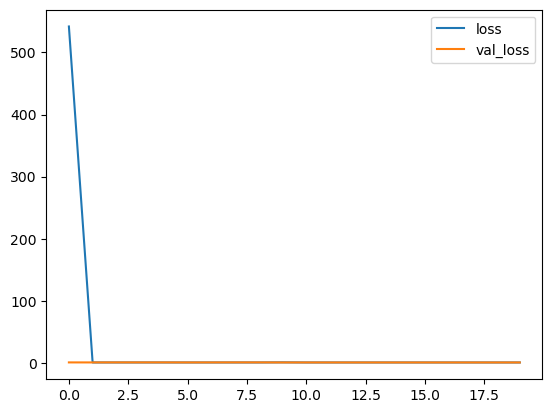

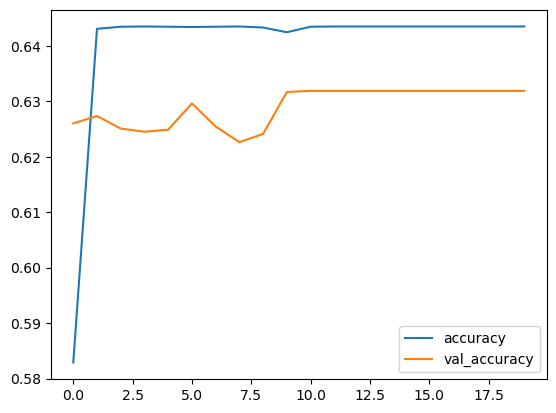

In [42]:
# loss, accuracy 값 시각화 
df_hist[["loss","val_loss"]].plot()
df_hist[["accuracy", "val_accuracy"]].plot()

In [43]:
y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 0s 1ms/step


(10000, 3)

In [48]:
submission=pd.read_csv('data/sample.csv')
submission.loc[:,1:] = y_pred
submission.to_csv('sub.csv', index=False)

In [50]:
pd.read_csv('sub.csv')

,index,0,1,2
0,26457,0.122151,0.232708,6.451408e-01
1,26458,0.122151,0.232708,6.451408e-01
2,26459,0.122151,0.232708,6.451408e-01
3,26460,0.122151,0.232708,6.451408e-01
4,26461,0.122151,0.232708,6.451408e-01
...,...,...,...,...
9995,36452,0.122151,0.232708,6.451408e-01
9996,36453,0.000000,0.999987,1.274534e-05
9997,36454,0.122151,0.232708,6.451408e-01
9998,36455,0.122151,0.232708,6.451408e-01


In [52]:
6.451408e-01

0.6451408